# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

# 2. Importing Dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This is a Binary Classification Problem as Loan Application to be approved would either be Yes/No, which is our Target Variable

# 3. Exploratory Data Analysis

In [3]:
df.shape

(614, 13)

Rows: 614<br>
Columns : 13

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Total Rows: 614<br>
Total Columns: 13<br>
Null Values columns: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History<br>
object type columns(string): 8<br>
float type columns(numerical): 4<br>
int type columns(numerical): 1<br>

In [6]:
#To find the no.of unique values in each columns
df.nunique().to_frame('No.of Unique values')

,No.of Unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [7]:
#To find the count of each unique values in a column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [8]:
#From above finding we can drop Loan_ID column since it has got all the unique values and it is nothing but ID(hence unique)

df.drop('Loan_ID', axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Using SimpleImputer to fill missing data (for Median and Mode datas)
from sklearn.impute import SimpleImputer

#for string values, we will use mode
list1=['Gender','Married','Dependents','Self_Employed']
imp1=SimpleImputer(strategy="most_frequent")
for i in list1:
    df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))
    
#for whole interger values, we will use median
list2=['Loan_Amount_Term','Credit_History']
imp2=SimpleImputer(strategy="median")
for i in list2:
    df[i]=imp2.fit_transform(df[i].values.reshape(-1,1))

#for float values we will use mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values are filled now.

# 4. Encodng Categorical Columns

In [12]:
from sklearn.preprocessing import LabelEncoder
list=['Gender','Married','Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [13]:
#Checking column dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [14]:
#Converting int32 to int64

list=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in list:
    df[i] = df[i].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


# 5. Description of Dataset

In [15]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Summary:<br>
1. Mean ~ Median : Gender, Married, Dependents, Education, Self_Employed, Credit_History, Property_Area, Loan_Status<br>
2. Mean > Median(right hand skewed): ApplicantIncome, CoapplicantIncome, LoanAmount <br>
3. Mean < Median(left hand skewed): Loan_Amount_Term<br>
4. Difference between 3rd qurtile and Maximum(presence of outliers): ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

# 6. Data Visualization

## 6.1 Checking Skewness

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

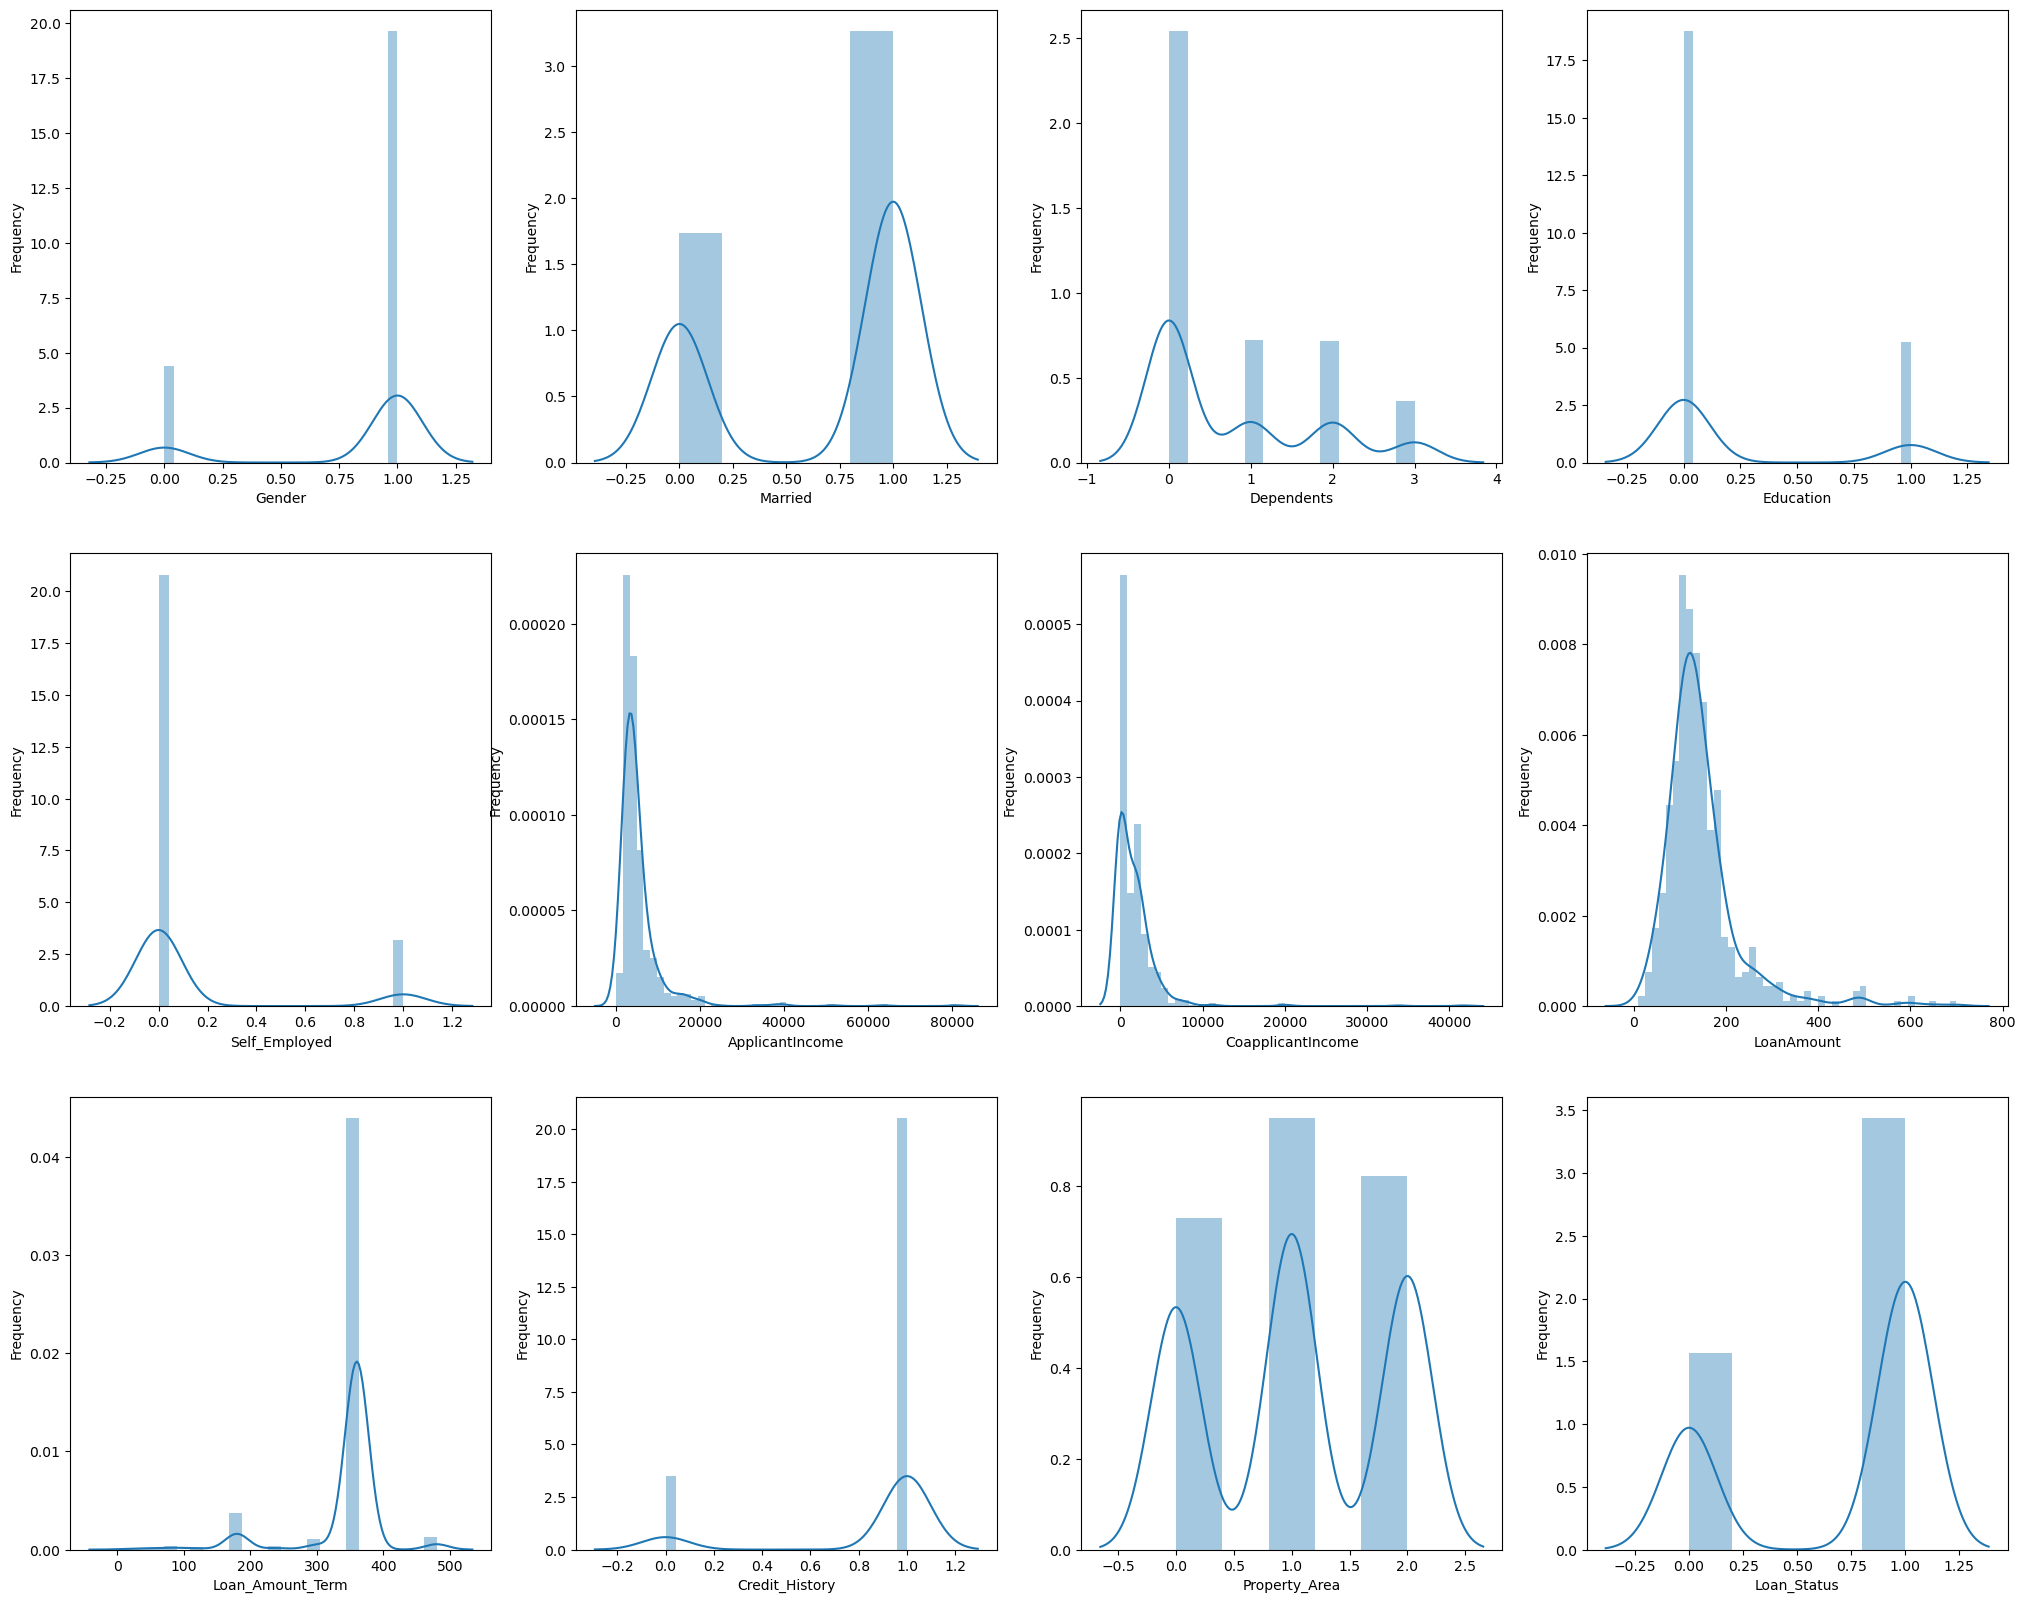

In [16]:
plt.figure(figsize=(25,20))
iterator=1
for i in df.columns:
    if iterator <=13:
        ax=plt.subplot(3, 4, iterator)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator+=1
plt.tight_layout

## 6.2 Checking and Removal of Outliers

### 6.2.1 Checking for Outliers

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

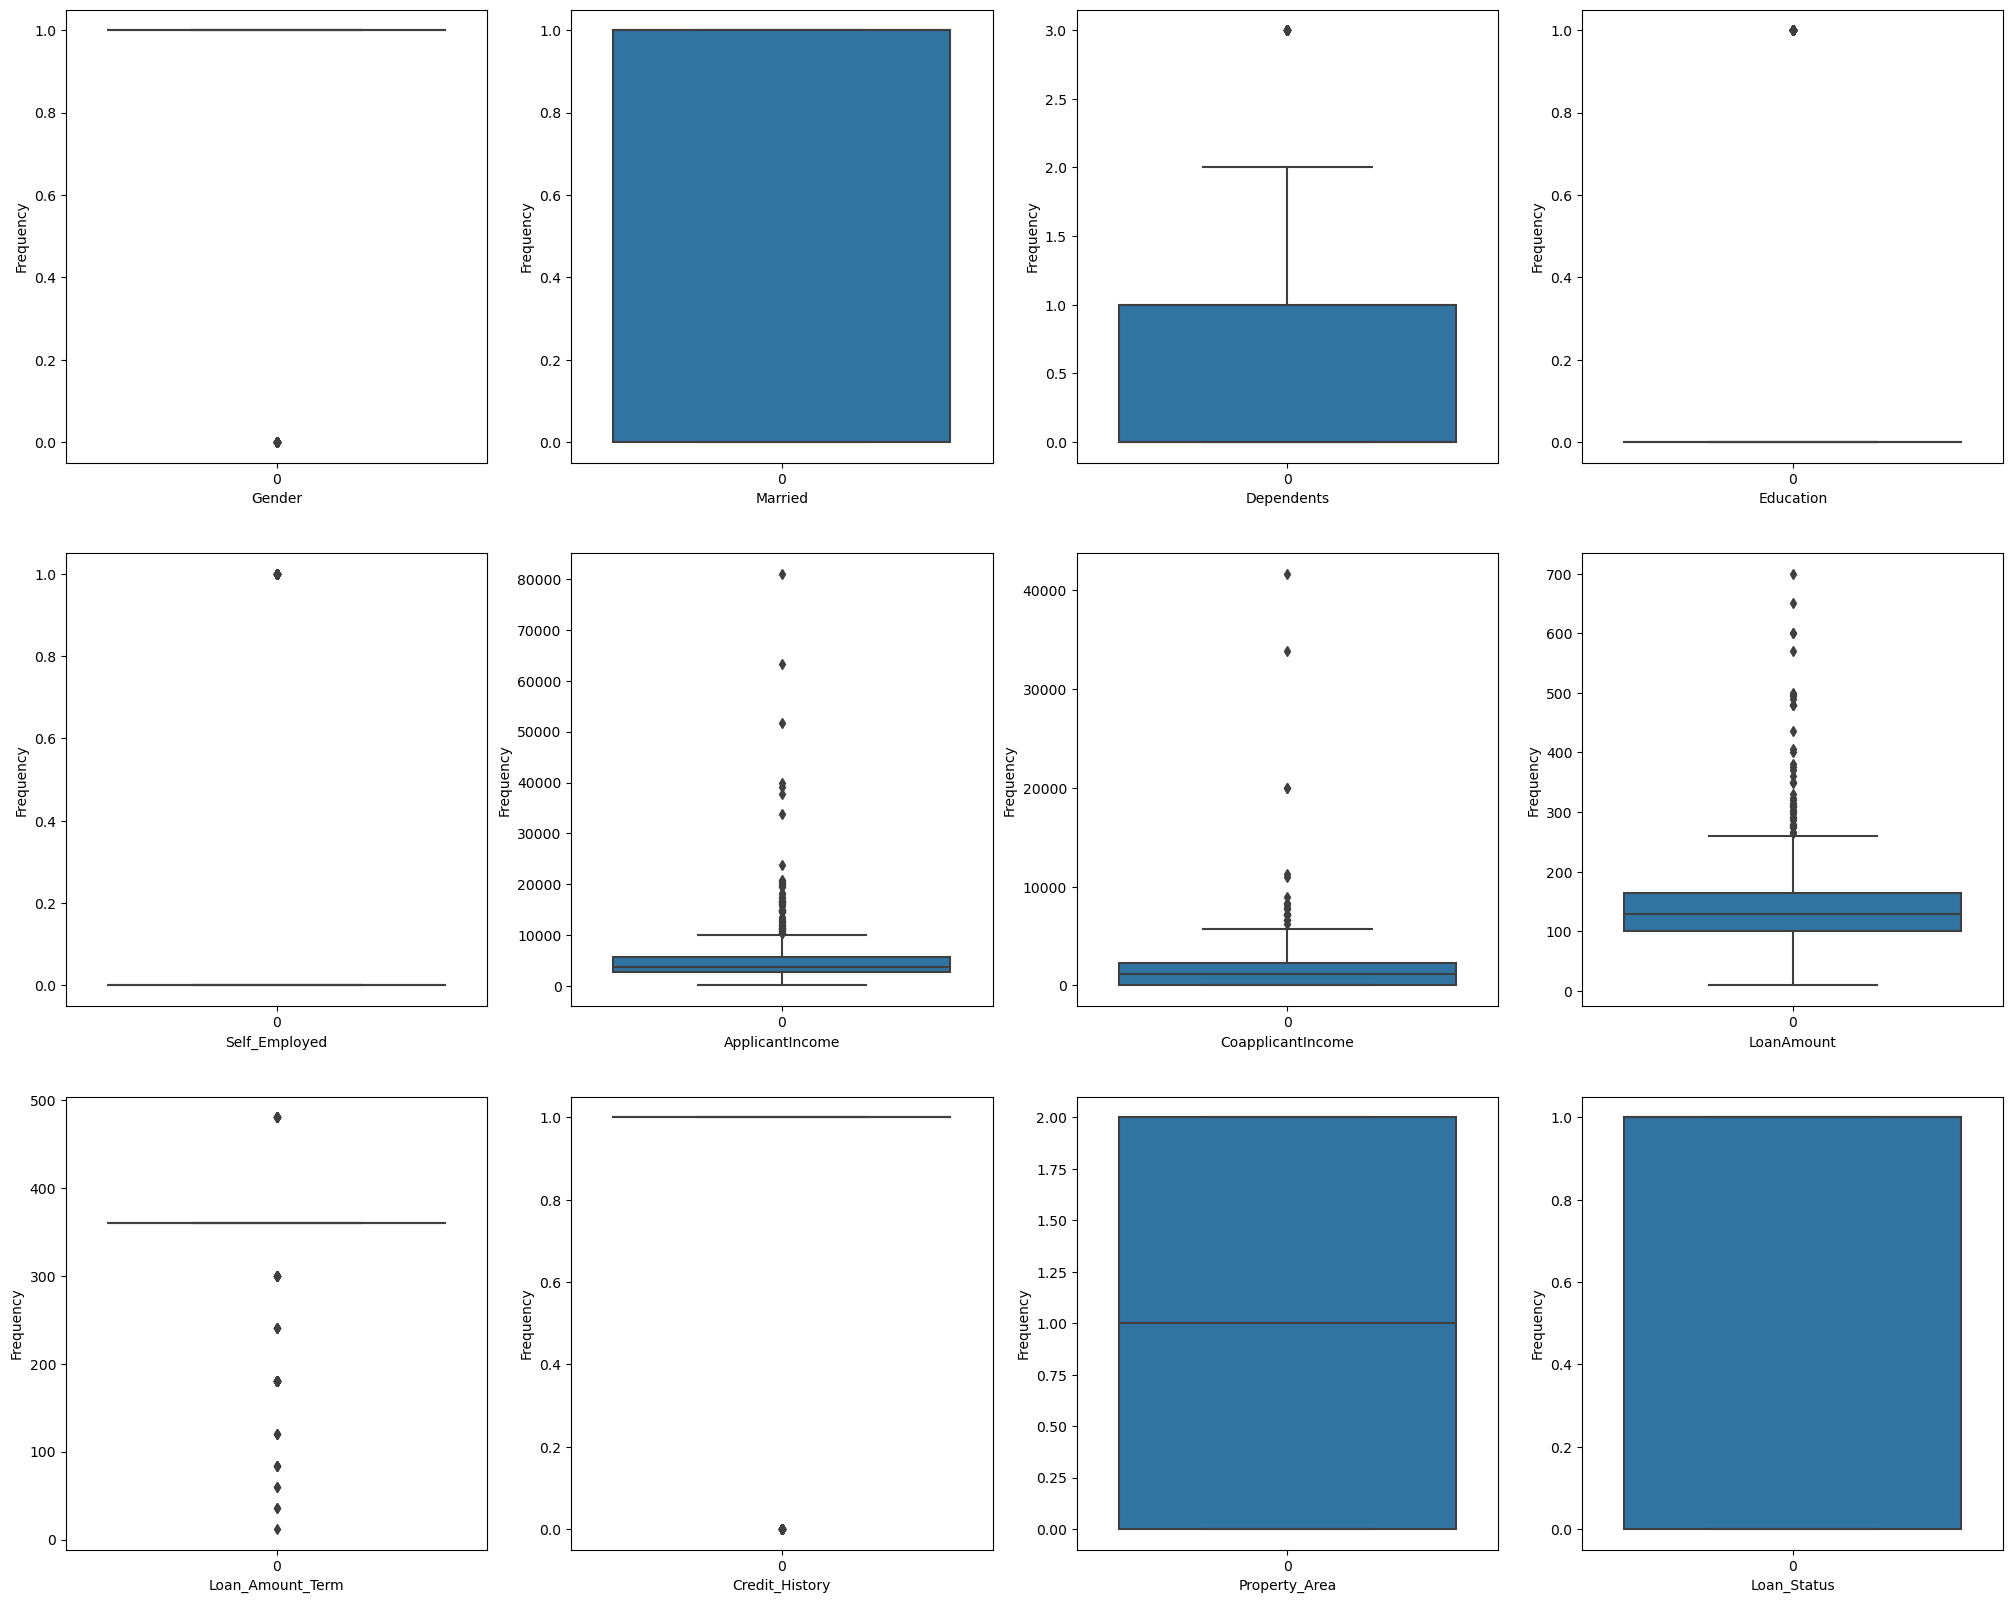

In [17]:
plt.figure(figsize=(25,20))
iterator=1

for i in df.columns:
    if iterator <=13:
        ax=plt.subplot(3,4, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator+=1
plt.tight_layout

### 6.2.2 Removing Outliers

In [18]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    q75,q25=np.percentile(df.loc[:,i], [75,25])
    intr_qr=q75-q25
    
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    
    df.loc[df[i]<min, i]=np.nan
    df.loc[df[i]>max, i]=np.nan

In [19]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           41
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
list=['ApplicantIncome','CoapplicantIncome','LoanAmount']
imp=SimpleImputer(strategy="mean")
for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

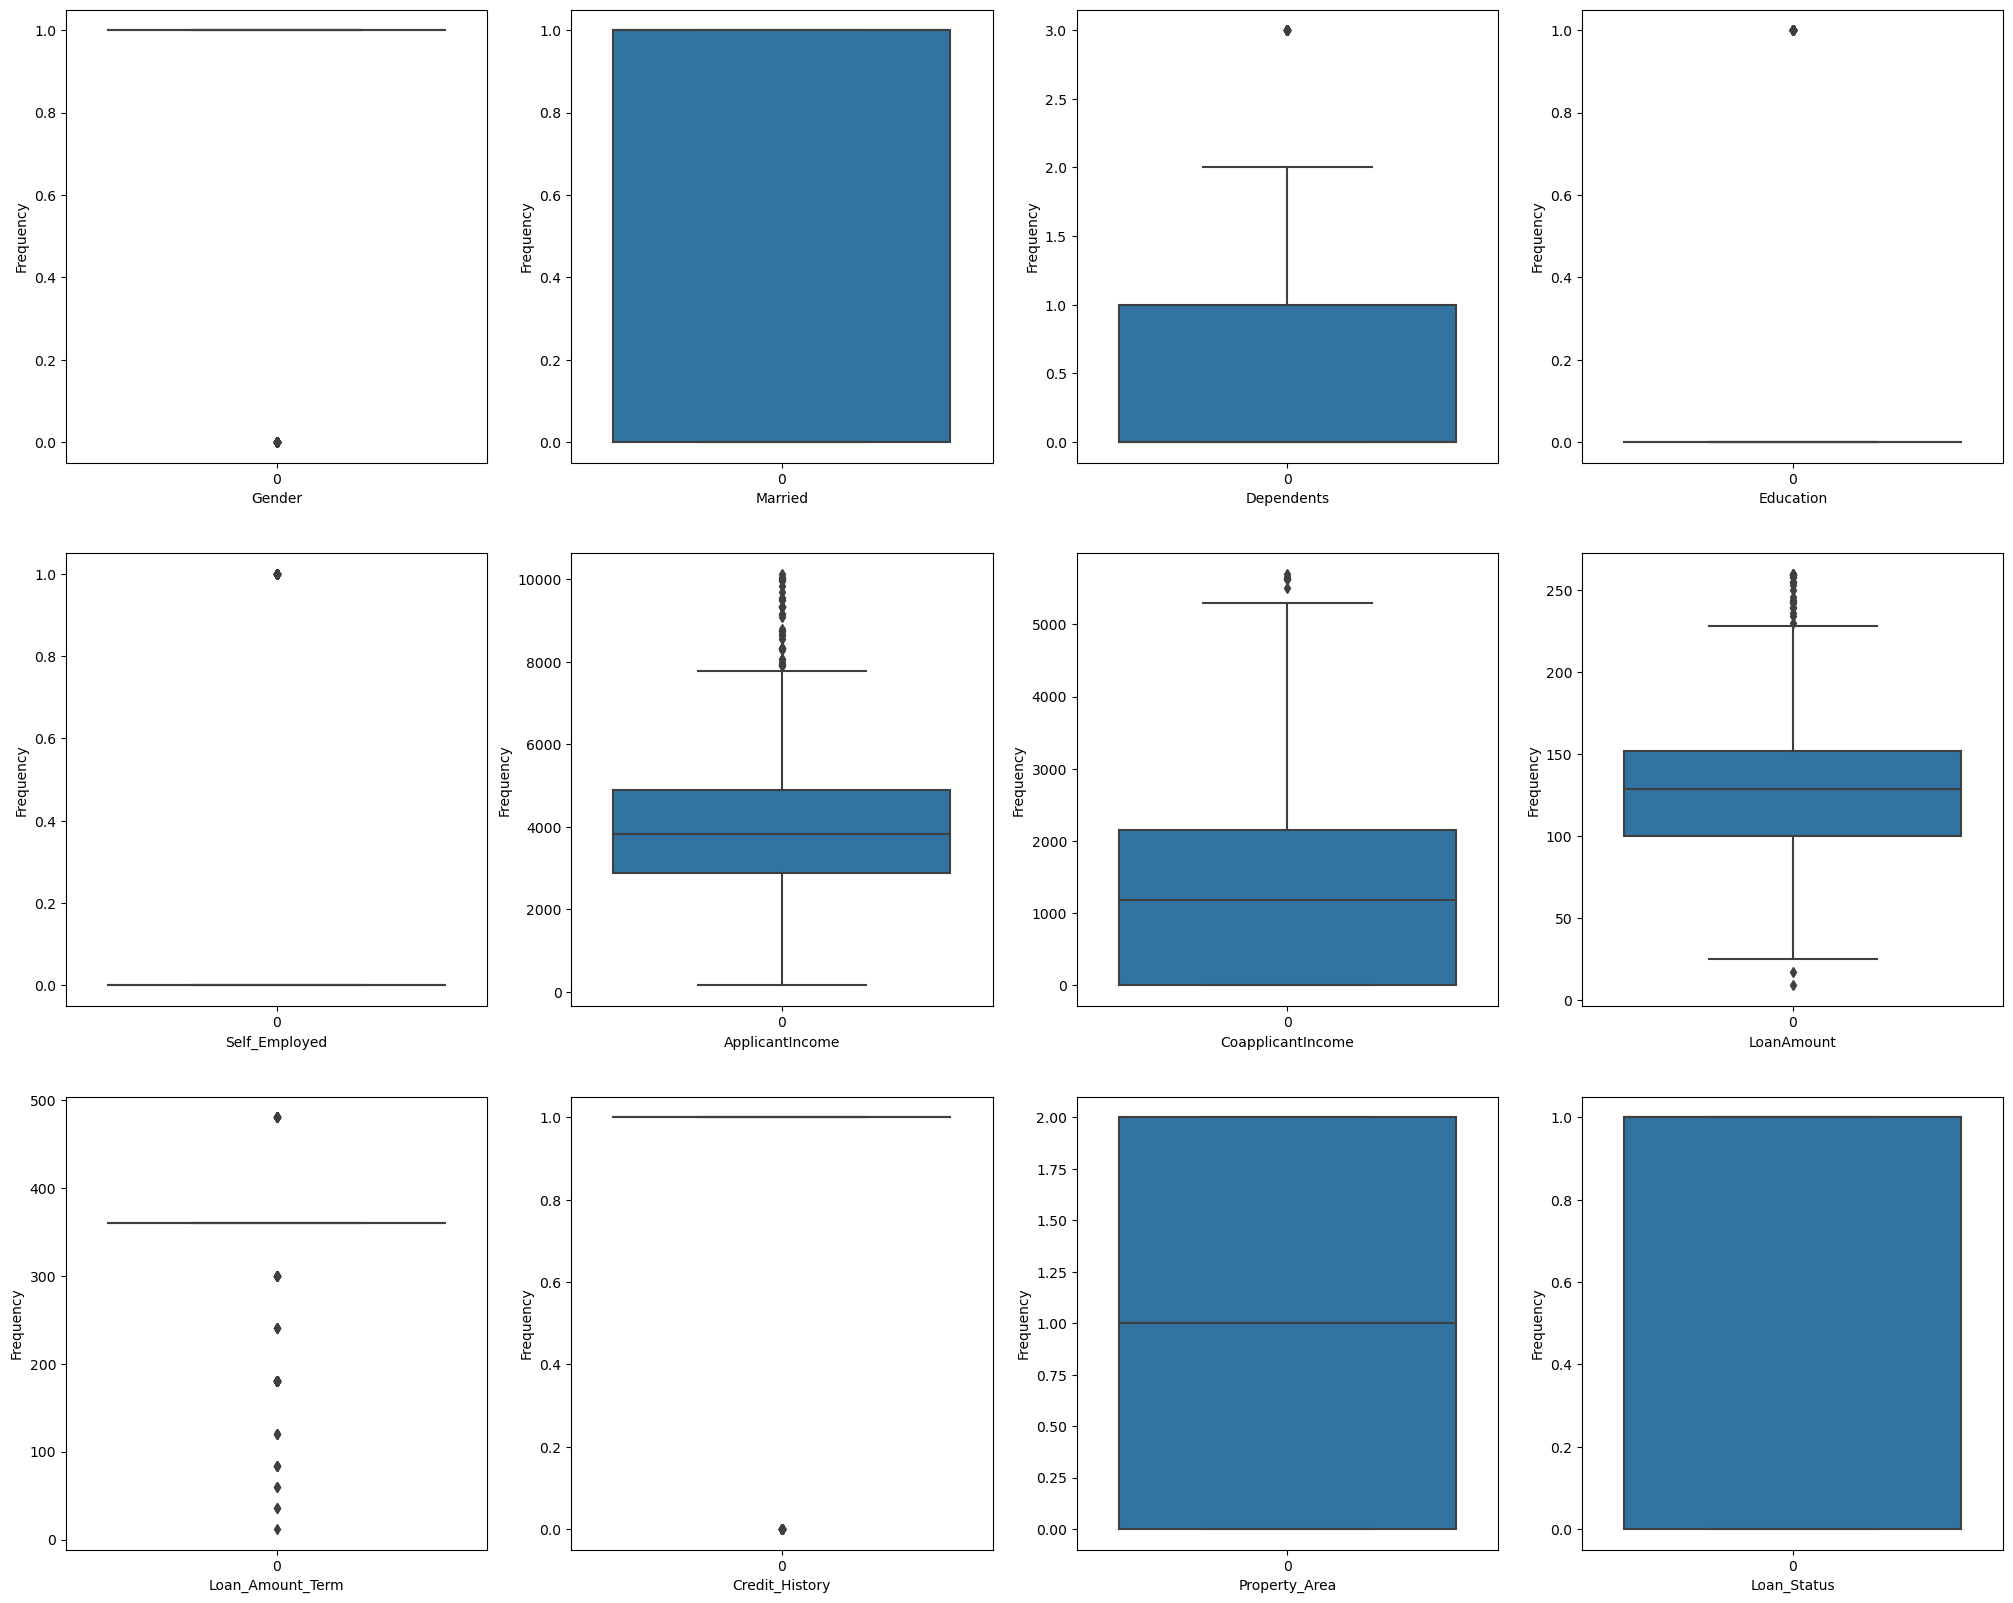

In [22]:
plt.figure(figsize=(25,20))
iterator=1

for i in df.columns:
    if iterator <=13:
        ax=plt.subplot(3,4, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator+=1
plt.tight_layout

## 6.3 Removal of Skewness from particular columns

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

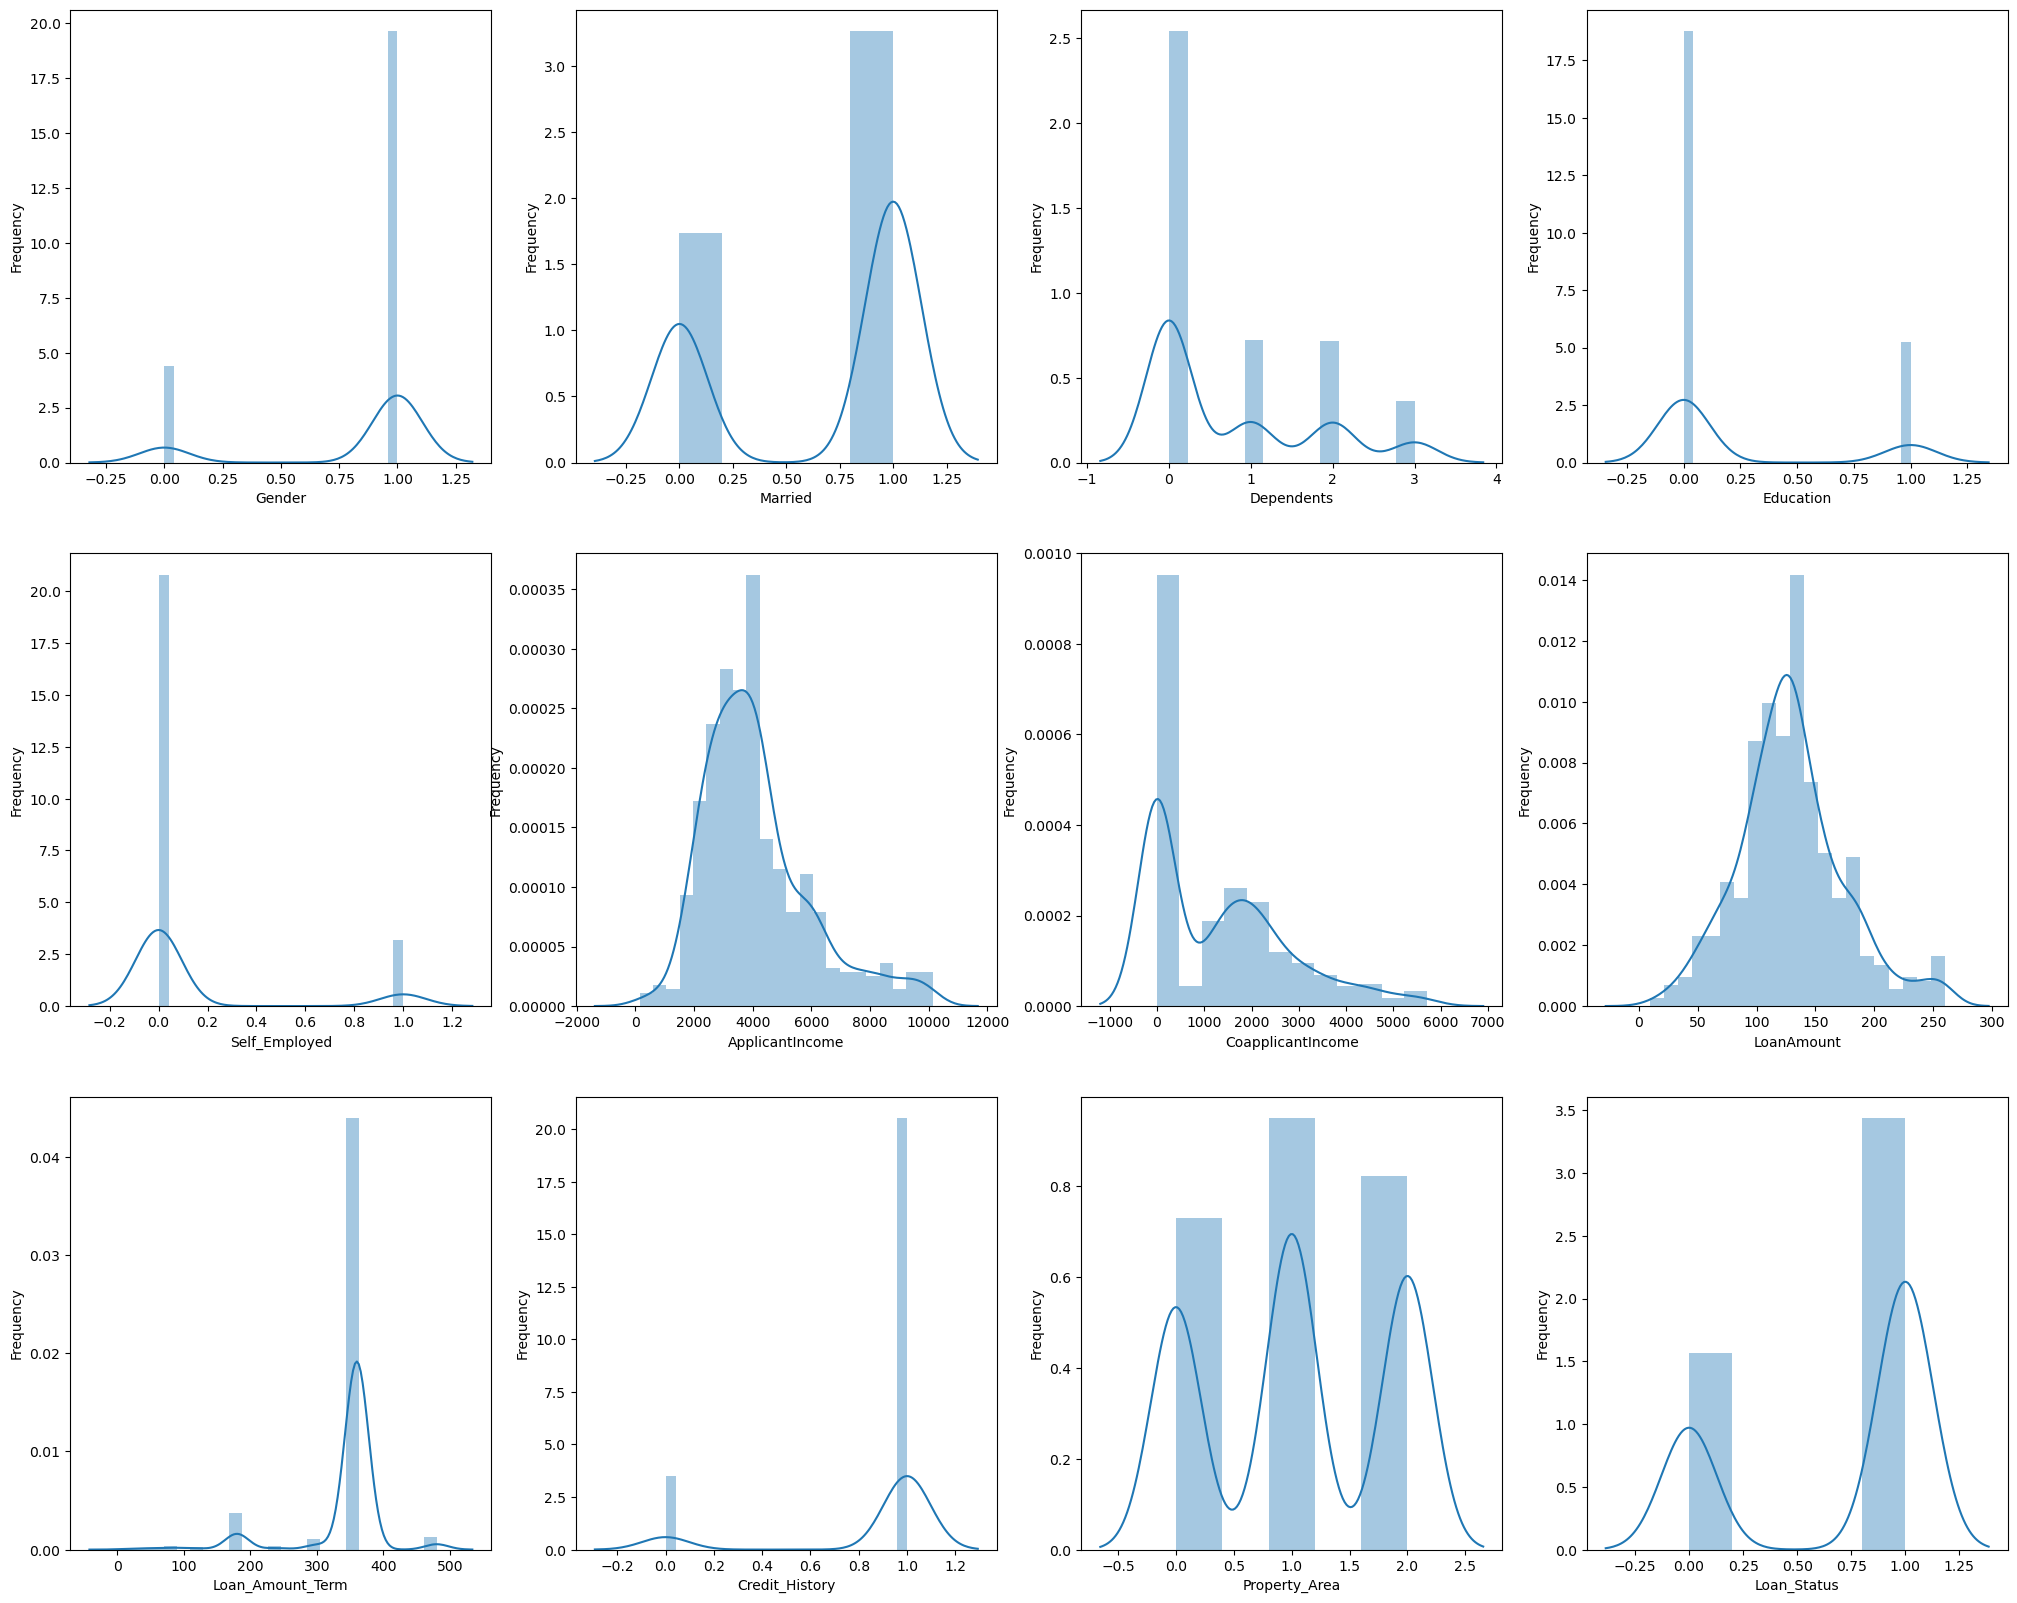

In [23]:
# Checking for skewness after outliers are managed
plt.figure(figsize=(25,20))
iterator=1
for i in df.columns:
    if iterator <=13:
        ax=plt.subplot(3, 4, iterator)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator+=1
plt.tight_layout

## 6.3 Bivariate Analysis

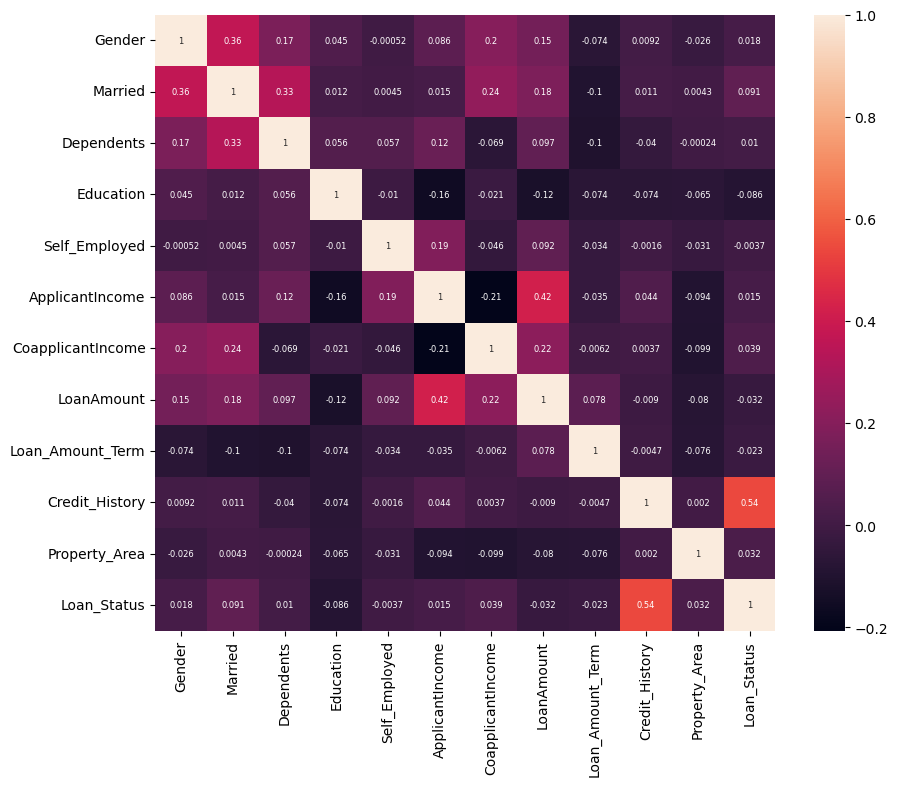

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 6})
plt.show()

Correlation with Loan_Status(Target)<br>
1. Credit_History and Education are having relationship with Target<br><br>

Correlation among independant variables<br>
1. Married: Gender, Dependents, CoapplicantIncome, LoanAmount, Loan_Amount_Term<br>
2. Dependents: Loan_Amount_Term<br>
3. Educaion: ApplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History<br>
4. Self_employed: ApplicantIncome, LoanAmount<br>
5. ApplicantIncome: CoapplicantIncome, LoanAmount<br>
6. CoapplicantIncome: Married, LoanAmount, PropertyArea<br>
7. LoanAmount: Gender, Loan_Amount_Term, Property_Area<br>
8. Loan_Amount_Term: Property_Area<br>
9. Credit_History: Loan_Status<br>

## 6.4 Multivariate Analysis

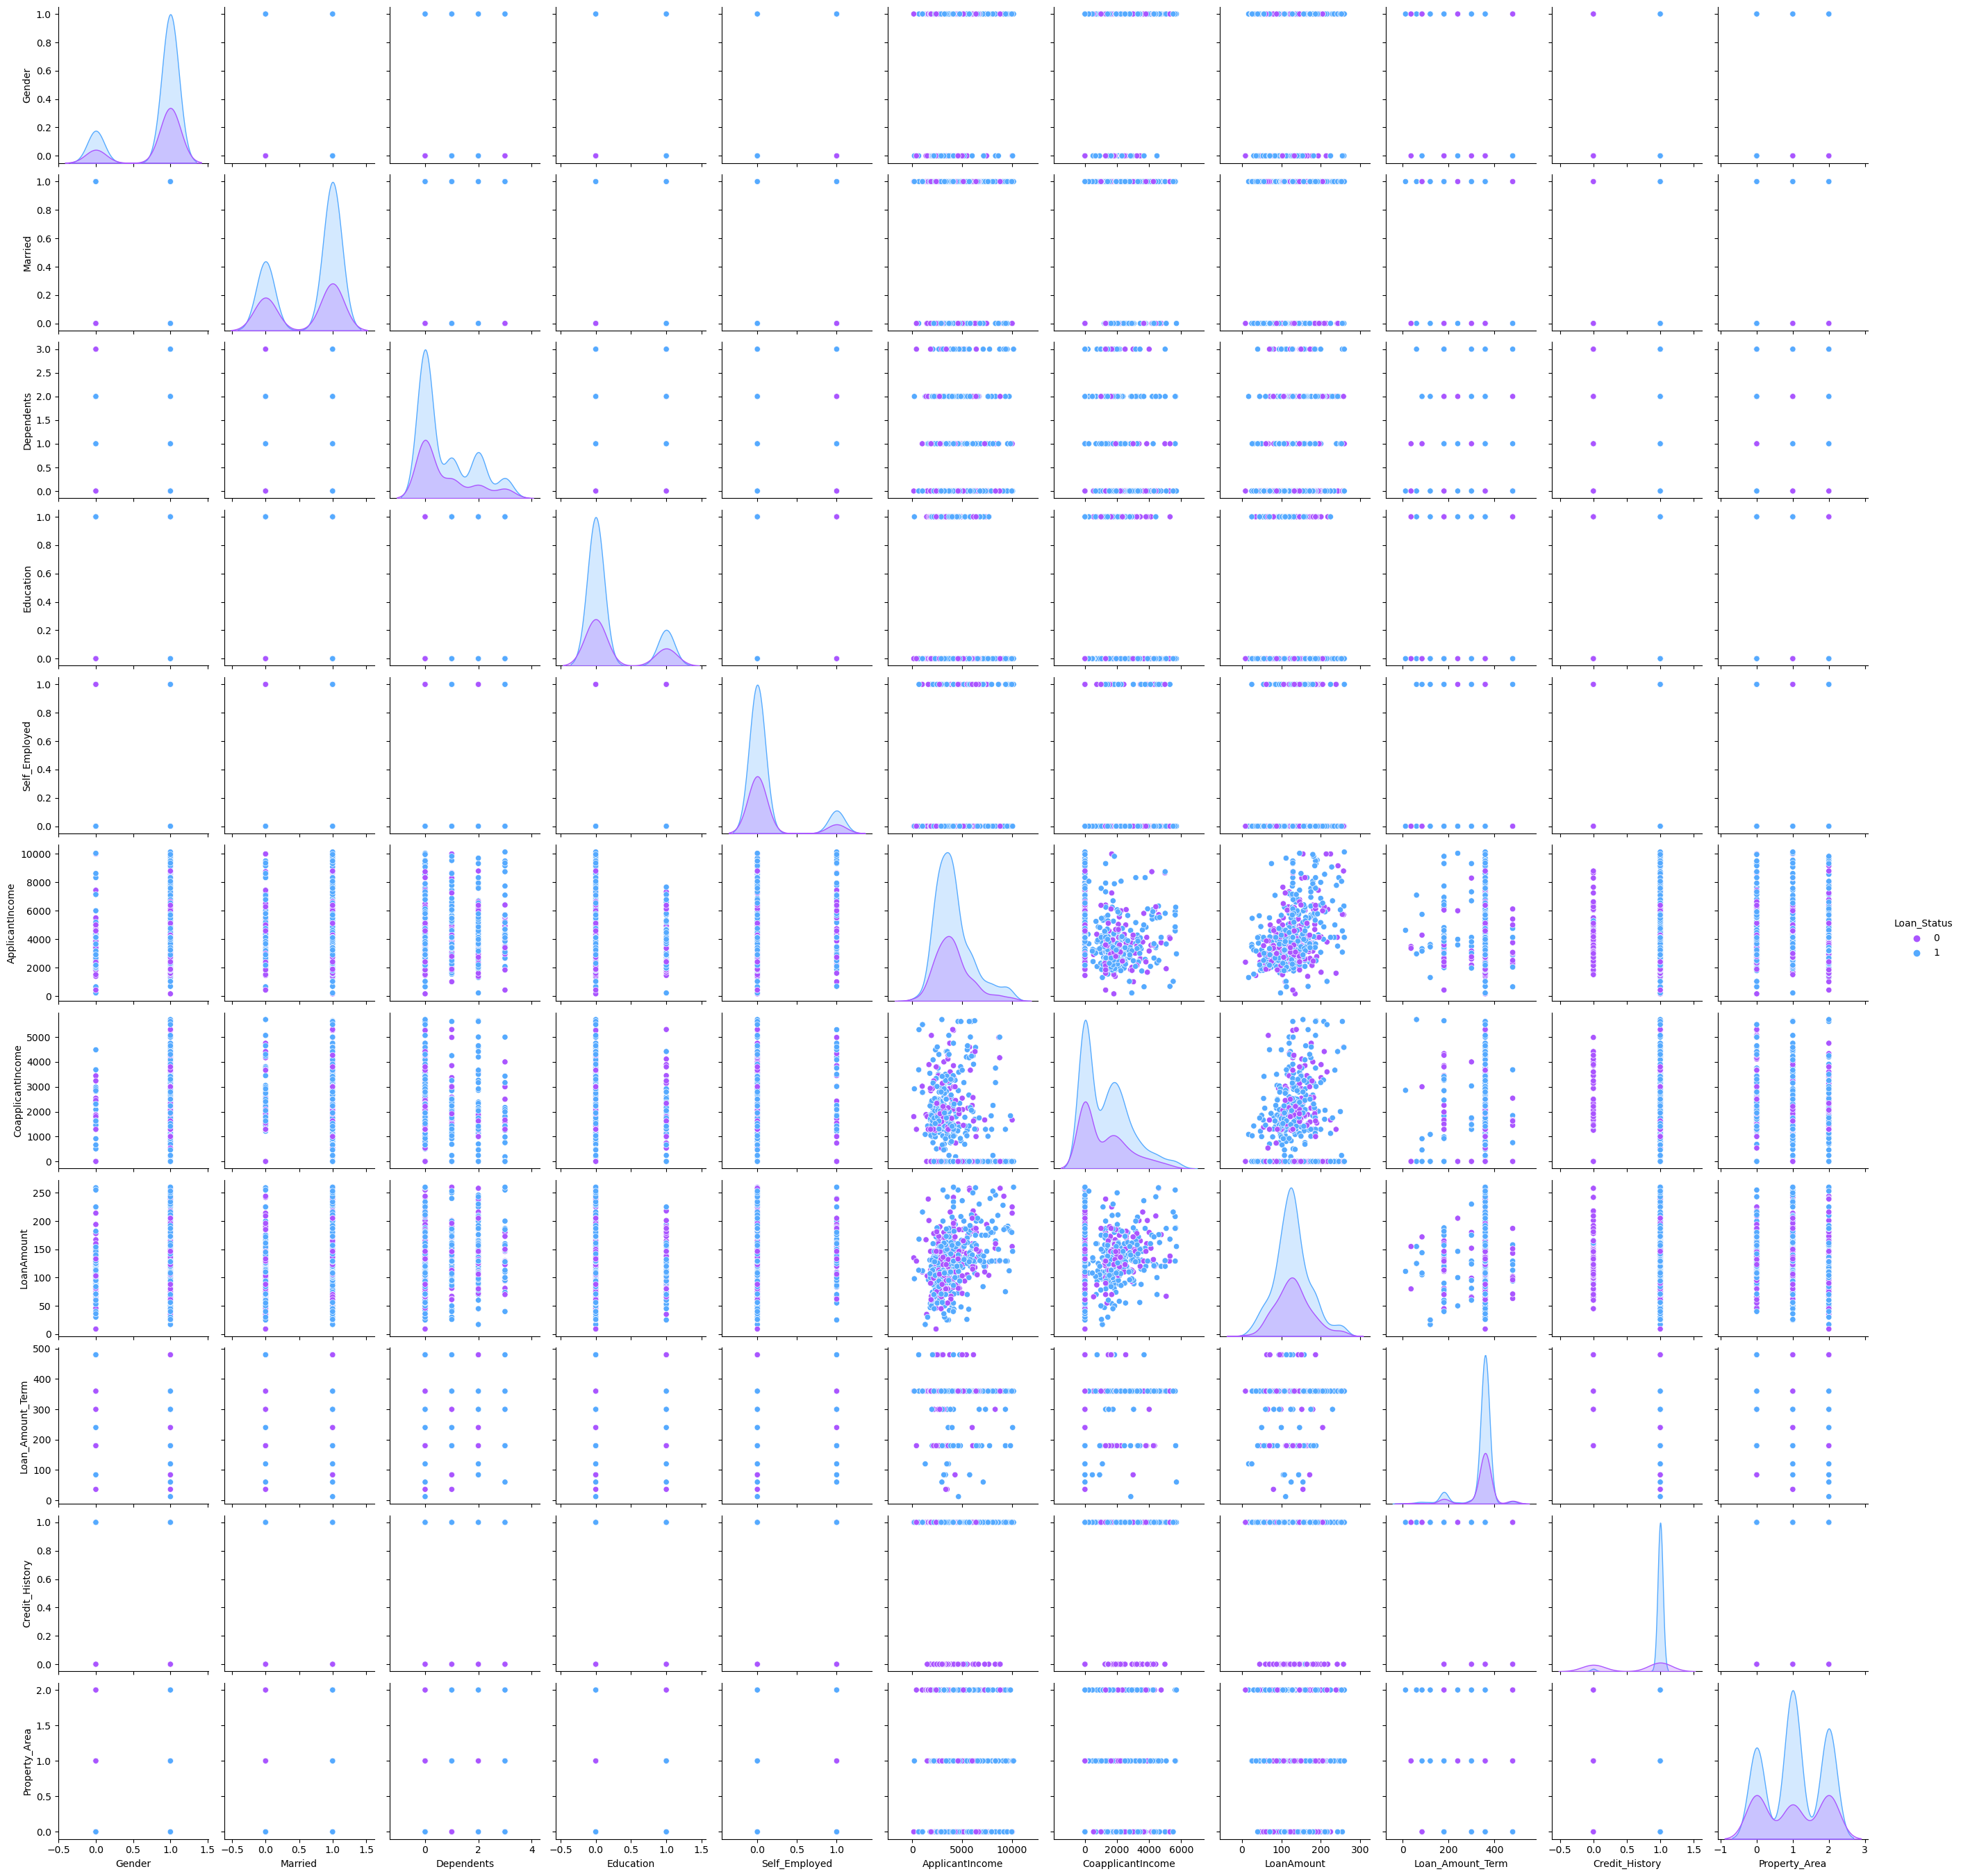

In [25]:
sns.pairplot(df, hue='Loan_Status', palette = 'cool_r')
plt.show()

1. ApplicantIncome and LoanAmount are proportional to each other<br>
2. Loan_Status is Yes for people having better Credit_History<br>

# 7. Working as per Problem Statement

Since Loan_Status is either Yes or No, it is a problem of Binomial Classification

## 7.1 Selection of Features

In [58]:
x=df[['Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','Credit_History']]
y=df[['Loan_Status']]

## 7.1.2 Feature Scaling Using Standard Feture

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Credit_History
0,-1.372089,-0.737806,-0.528362,0.934453,-0.895894,0.383678,1.223298,0.411733
1,0.728816,0.253470,-0.528362,0.248358,0.152107,-0.026519,-1.318513,0.411733
2,0.728816,-0.737806,-0.528362,-0.609532,-0.895894,-1.407791,1.223298,0.411733
3,0.728816,-0.737806,1.892641,-0.835520,0.742823,-0.204748,1.223298,0.411733
4,-1.372089,-0.737806,-0.528362,1.016286,-0.895894,0.263102,1.223298,0.411733
...,...,...,...,...,...,...,...,...
609,-1.372089,-0.737806,-0.528362,-0.663726,-0.895894,-1.296398,-1.318513,0.411733
610,0.728816,2.236021,-0.528362,-0.010147,-0.895894,-1.987034,-1.318513,0.411733
611,0.728816,0.253470,-0.528362,2.139184,-0.729103,2.758303,1.223298,0.411733
612,0.728816,1.244745,-0.528362,1.874176,-0.895894,1.287917,1.223298,0.411733


## 7.1.3 Removing Multicolinearity using VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.234045,Married
1,1.174507,Dependents
2,1.050310,Education
3,1.410878,ApplicantIncome
4,1.275415,CoapplicantIncome
5,1.396059,LoanAmount
6,1.033867,Property_Area
7,1.010505,Credit_History


VIF value~1 means there is very low multicolinearity among features.

## 7.1.4 Oversampling

In [61]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [62]:
#We find the value count is the original target
y.value_counts()

#It can be found that there is a class imbalance problem

Loan_Status
1              422
0              192
dtype: int64

In [63]:
#Trying to find the count in target are oversampling is done
y1.value_counts()

Loan_Status
0              422
1              422
dtype: int64

# 8.Modelling

## 8.1 Finding best random state model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

maxAcc = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    class_report = classification_report(y_test, pred)

    if acc > maxAcc:
        maxAcc = acc
        maxRs = i

print("Best Accuracy:", maxAcc)
print(conf_matrix)
print(class_report)
print("Best Random State:", maxRs)

Best Accuracy: 0.8757396449704142
[[57 30]
 [ 4 78]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.77        87
           1       0.72      0.95      0.82        82

    accuracy                           0.80       169
   macro avg       0.83      0.80      0.80       169
weighted avg       0.83      0.80      0.79       169

Best Random State: 130


## 8.2 Creating Train Test Split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1, test_size=0.2, random_state=130)

## 8.3 Passing all models

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
# We are using the oversampled data to make the model.
Accuracy_Score=[]
Classification_Report=[]
Confusion_Matrix=[]

model = [LogisticRegression(),GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

model_names = ["LogisticRegression", "GaussianNB","Decision Tree Classifier", "SVC", "KNeighbors Classifier","Random Forest Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier"]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    acc= accuracy_score(y_test,predm)
    conf_matrix= confusion_matrix(y_test,predm)
    class_report= classification_report(y_test,predm)
    
    Accuracy_Score.append(acc)
    Classification_Report.append(class_report)
    Confusion_Matrix.append(conf_matrix)
    
result_df=pd.DataFrame({
    "Model":model_names,
    "Accuracy Score":Accuracy_Score,
    "Classification Report": Classification_Report,
    "Confusion_Matrix": Confusion_Matrix
})
print(result_df)

                          Model  Accuracy Score  \
0            LogisticRegression        0.745562   
1                    GaussianNB        0.751479   
2      Decision Tree Classifier        0.798817   
3                           SVC        0.775148   
4         KNeighbors Classifier        0.822485   
5      Random Forest Classifier        0.857988   
6        Extra Trees Classifier        0.869822   
7  Gradient Boosting Classifier        0.804734   
8           AdaBoost Classifier        0.745562   

                               Classification Report      Confusion_Matrix  
0                precision    recall  f1-score   ...   [[44, 38], [5, 82]]  
1                precision    recall  f1-score   ...   [[40, 42], [0, 87]]  
2                precision    recall  f1-score   ...  [[64, 18], [16, 71]]  
3                precision    recall  f1-score   ...  [[54, 28], [10, 77]]  
4                precision    recall  f1-score   ...  [[68, 14], [16, 71]]  
5                precision 

# We can see that RandomForest Classifier has highest accuracy. 

# 9.Using Cross_val model to find the accuracy

In [80]:
# Using Cross val model to remove bias variance tradeoff and on all models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

model = [LogisticRegression(),GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

model_names = ["LogisticRegression", "GaussianNB","Decision Tree Classifier", "SVC", "KNeighbors Classifier","Random Forest Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier"]

#Using KFold cross validation for k=5
k=5
cv=KFold(n_splits=k, shuffle=True, random_state=130)

result=[]

#Passing through all models
for m, name in zip(model,model_names):
    scores=cross_val_score(m, x1, y1, cv=cv, scoring='accuracy')
    avg_scores=scores.mean()
    result.append((name, avg_scores))

result_df=pd.DataFrame(result,columns=["Model","Avg Accuracy Score"])
print(result_df)

                          Model  Avg Accuracy Score
0            LogisticRegression            0.708509
1                    GaussianNB            0.700211
2      Decision Tree Classifier            0.734503
3                           SVC            0.718005
4         KNeighbors Classifier            0.759482
5      Random Forest Classifier            0.803283
6        Extra Trees Classifier            0.804473
7  Gradient Boosting Classifier            0.773633
8           AdaBoost Classifier            0.732213


# ExtraTressClassifer has the best avg accuracy on cross_val_score

# 10. Fiting on the Actual Data

In [81]:
x

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Credit_History
0,-1.372089,-0.737806,-0.528362,0.934453,-0.895894,0.383678,1.223298,0.411733
1,0.728816,0.253470,-0.528362,0.248358,0.152107,-0.026519,-1.318513,0.411733
2,0.728816,-0.737806,-0.528362,-0.609532,-0.895894,-1.407791,1.223298,0.411733
3,0.728816,-0.737806,1.892641,-0.835520,0.742823,-0.204748,1.223298,0.411733
4,-1.372089,-0.737806,-0.528362,1.016286,-0.895894,0.263102,1.223298,0.411733
...,...,...,...,...,...,...,...,...
609,-1.372089,-0.737806,-0.528362,-0.663726,-0.895894,-1.296398,-1.318513,0.411733
610,0.728816,2.236021,-0.528362,-0.010147,-0.895894,-1.987034,-1.318513,0.411733
611,0.728816,0.253470,-0.528362,2.139184,-0.729103,2.758303,1.223298,0.411733
612,0.728816,1.244745,-0.528362,1.874176,-0.895894,1.287917,1.223298,0.411733


In [82]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [84]:
ETC=ExtraTreesClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=130)
ETC.fit(x_train,y_train)
pred=ETC.predict(x_test)
acc=accuracy_score(pred,y_test)
conf_matrix=confusion_matrix(pred,y_test)
class_report=classification_report(pred,y_test)

print("Accuracy Score:", acc)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy Score: 0.7723577235772358
Confusion Matrix: [[19 12]
 [16 76]]
Classification Report:               precision    recall  f1-score   support

           0       0.54      0.61      0.58        31
           1       0.86      0.83      0.84        92

    accuracy                           0.77       123
   macro avg       0.70      0.72      0.71       123
weighted avg       0.78      0.77      0.78       123



# 11.Hyperparameter Tuning

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [1,100],
              'max_depth': [None, 5],
              'max_features':['auto','sqrt'],
              'random_state':[1,100],
             }
etc=ExtraTreesClassifier()
GCV=GridSearchCV(etc, parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 100], 'random_state': [1, 100]})

In [86]:
GCV.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100,
 'random_state': 1}

# 12. Selecting the final model with best parameters

In [87]:
FinalModel_Classification=ExtraTreesClassifier(max_depth=5, max_features='auto', n_estimators=100, random_state=1)
FinalModel_Classification.fit(x_train,y_train)
pred=FinalModel_Classification.predict(x_test)
acc=accuracy_score(y_test,pred)
print(f"Accuracy Score: {acc*100}")

Accuracy Score: 85.36585365853658


# 13. Saving the best model

In [88]:
import joblib
joblib.dump(FinalModel_Classification,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']